News Mood 
using Vader analysis to evaluate 5 news sources for their sentiment score in their last 100 tweets.
User will need Twitter API keys placed in config.py to use this code

In [1]:
# Dependencies 
import json
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#setup output files
csv_outfile="results/news_tweets.csv"
scatter=["results/scatter1.png","results/scatter2.png","results/scatter3.png","results/scatter4.png","results/scatter5.png"]
bargraph="results/bargraph.png"

In [2]:
# Target Search Term
target_terms = ("@BBCBreaking", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

tweet_dict = []                        #storage for tweet data
target_overall=[]                     #storage for target average result

In [3]:
# Loop through all target users
for target in target_terms:
    tweets_ago=1
    try:
                                      # get 100 target tweets
        public_tweets=api.user_timeline(target,count=100) 

        for tweet in public_tweets:      # Loop through all tweets  
            target_string=tweet["text"]
                                         # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(target_string)             
            entry={"source":target,               # store values for each tweet
                   "tweets ago":tweets_ago,
                   "created":tweet["created_at"],
                   "text":tweet["text"],
                   "compound":results["compound"],
                   "positive":results["pos"],
                   "negative":results["neg"],
                   "neutral":results["neu"]}
            tweet_dict.append(entry)
            tweets_ago+=1

    except:
        print(f"Error retrieving tweets for {target}")
        

In [4]:
tweet_df=pd.DataFrame(tweet_dict)         #put all tweet data in data frame and sort by tweets ago
tweet_sort=tweet_df.sort_values(["source","tweets ago"]) 
tweet_sort=tweet_sort[["source","text","created","compound","positive","negative","neutral","tweets ago"]]
tweet_sort.to_csv(csv_outfile,header=True,index=False)

In [5]:
now = datetime.now()
timestamp = now.strftime("%Y-%m-%d %H:%M")
stamp2 =now.strftime("%H:%M")


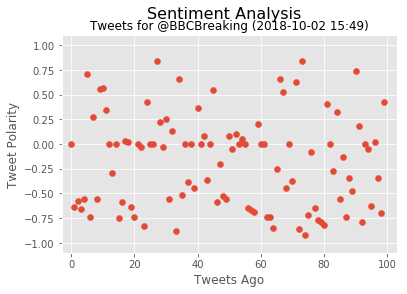

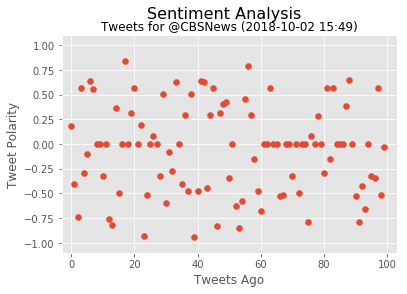

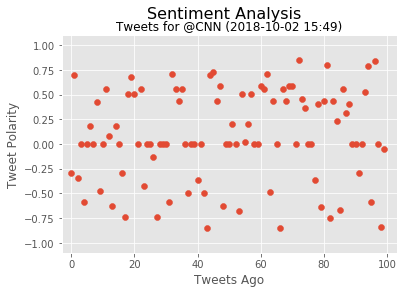

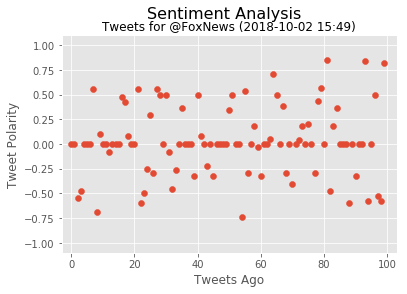

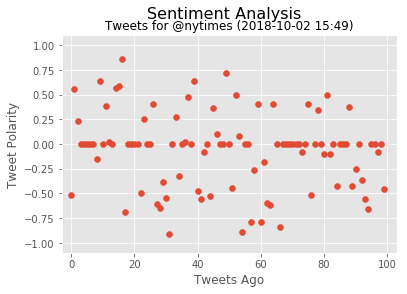

In [6]:

graph=0
                                              #make scatter plots 
for target in target_terms:
    target_graph=tweet_sort[tweet_sort["source"]== target]
    y_axis=target_graph["compound"]
    x_axis=np.arange(0,len(y_axis),1)
    
    plt.scatter(x_axis,y_axis)
    plt.suptitle(f"Sentiment Analysis",fontsize=16)
    plt.title(f"Tweets for {target} ({timestamp})",fontsize=12)
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    plt.xlim(-3,103)
    plt.ylim(-1.1,1.1)
    plt.savefig(scatter[graph])        #save plot to file
    graph+=1
    plt.show()
                         # store overall sentiment for target
    target_overall.append(np.mean(y_axis)) 

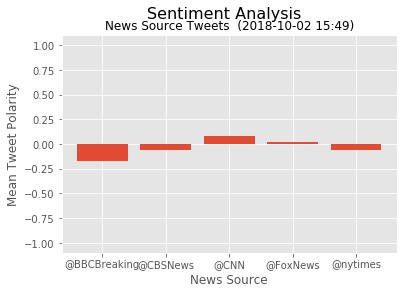

In [8]:
                 # bar graph the average compound score by news source
plt.bar(target_terms,target_overall)            
plt.suptitle(f"Sentiment Analysis",fontsize=16)
plt.title(f"News Source Tweets  ({timestamp})",fontsize=12)
plt.ylabel("Mean Tweet Polarity",fontsize=12)
plt.xlabel("News Source",fontsize=12)
plt.ylim(-1.1,1.1)
plt.savefig(bargraph)             #save to file
plt.show()